In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import matplotlib.pyplot as plt
import numpy as np

from constants import BASE_SAVE_DIR, SAVE_EXTENSION, PROJECT_NAME_BASE, FONTSIZE, SZ_COL, SZ_ROW
from utils import render_in_latex, set_fontsize, get_save_path, get_runs, get_metrics_and_colors, get_metric_statistics, plot_metric_statistics

In [2]:
dataset = "houseelec"
metric = "test_posterior_samples_mean_nll"
x_axis_name = "time"

In [3]:
set_fontsize(FONTSIZE)
render_in_latex()

In [4]:
runs = get_runs(PROJECT_NAME_BASE + dataset)
metrics_dict, colors_dict = get_metrics_and_colors(runs, metric)
statistics_dict = get_metric_statistics(metrics_dict)
save_path = get_save_path(f"{BASE_SAVE_DIR}/{dataset}/{metric}", f"{x_axis_name}.{SAVE_EXTENSION}")

/home/pratikr/scalable_gp_inference/plotting/utils.py:105: UserWarning: Not all MetricData objects have the same steps. This may lead to incorrect results. This is likely because some runs were not finished. We will return None for the mean, min, and max data.
  warnings.warn(
/home/pratikr/scalable_gp_inference/plotting/utils.py:179: UserWarning: Skipping SDD-100 due to inconsistent metric data across runs.
  warnings.warn(


In [28]:
plot_metric_statistics(statistics_dict, colors_dict, x_axis_name, dataset, save_path=save_path)

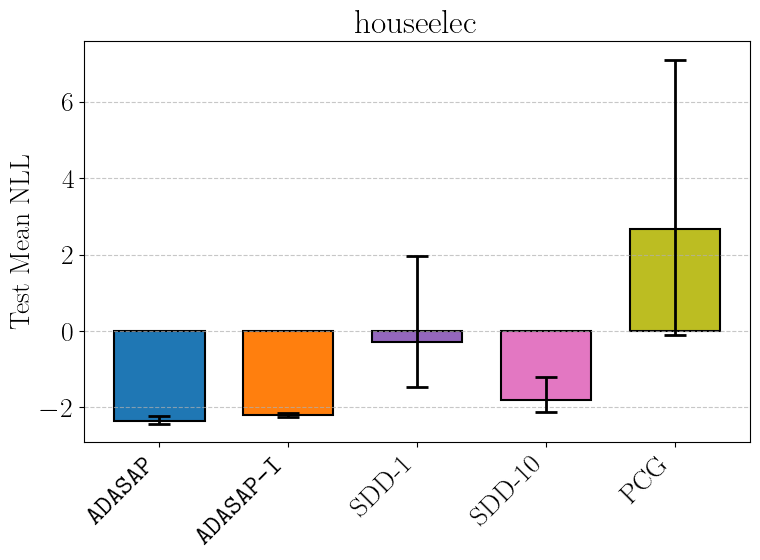

In [7]:
fig, ax = plt.subplots(figsize=(SZ_COL, SZ_ROW))

# Lists to store data for the bar chart
opt_names = []
final_values = []
lower_bounds = []
upper_bounds = []

for i, (opt_name, statistics) in enumerate(list(statistics_dict.items())):
    mean_data, lower_bound_data, upper_bound_data = statistics

    # Extract name for y-axis
    metric_name = mean_data.metric_name

    # Store the final values (last element of each array)
    if mean_data.finished:
        opt_names.append(opt_name)
        final_values.append(mean_data.metric_data[-1])
        lower_bounds.append(lower_bound_data.metric_data[-1])
        upper_bounds.append(upper_bound_data.metric_data[-1])

# Calculate error bar heights
lower_errors = np.array(final_values) - np.array(lower_bounds)
upper_errors = np.array(upper_bounds) - np.array(final_values)
errors = np.vstack([lower_errors, upper_errors])

# Create bar positions
x_pos = np.arange(len(opt_names))

# Create the bar chart
bars = ax.bar(
    x_pos,
    final_values,
    width=0.7,
    align='center',
    yerr=errors,
    capsize=8,
    color=[colors_dict[name] for name in opt_names],
    edgecolor='black',
    linewidth=1.5,
    error_kw={'elinewidth': 2, 'capthick': 2}
)

# Add labels and title
ax.set_ylabel(metric_name)
ax.set_title(dataset)
ax.set_xticks(x_pos)
ax.set_xticklabels(opt_names, rotation=45, ha='right')

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
fig.show()